# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF


In [56]:
#%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(12, 8)
sns.set()

## Parte 1

### _Setup_ da parte 1

In [57]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000), #Gerando 10000 valores normais de média 20 o desvio padrão é 4 variância 16, o desvio padrão é a raiz quadrada da variância 
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [58]:
# Sua análise da parte 1 começa aqui
dataframe

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21
...,...,...
9995,25.204408,22
9996,12.006620,24
9997,17.178733,17
9998,21.983062,23


In [59]:
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


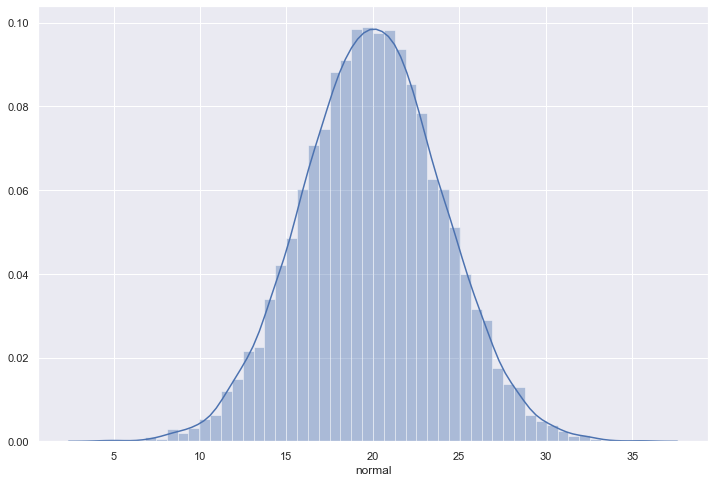

In [60]:
sns.distplot(dataframe.normal);

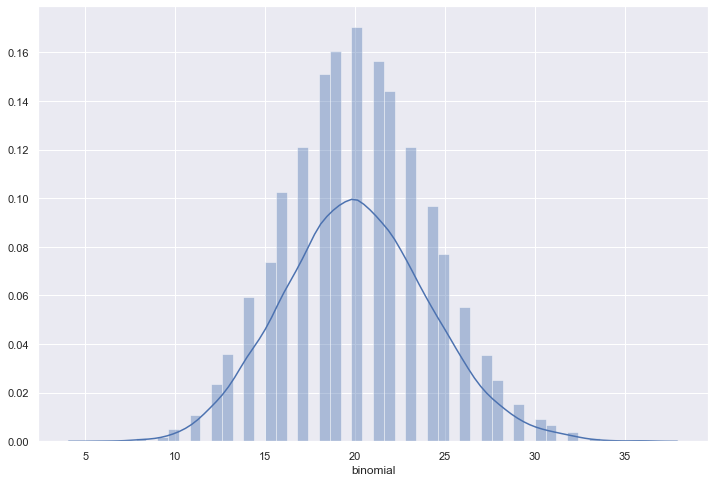

In [61]:
sns.distplot(dataframe.binomial);

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [62]:
# quantile: quantil - Serve para separar os quantis
def q1():
    quantiles = dataframe.quantile([.25, .5, .75])
    quantiles_difference = quantiles['normal'] - quantiles['binomial']
    return tuple(quantiles_difference.round(3).to_list())
    pass
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [63]:
# Função de distribuição cumulativa empírica (ECDF)
# A round() é uma função que retorna um número de ponto flutuante que é uma versão arredondada do número especificado,
# com um número estipulado de casas decimais.
def q2():
    bottom = dataframe.normal.mean() - dataframe.normal.std()
    higher = dataframe.normal.mean() + dataframe.normal.std()
    
    ecdf = ECDF(dataframe.normal)
    
    return  float(round(ecdf(higher) - ecdf(bottom), 3))
    pass

q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [64]:
def q3():
    dataframe_agg = dataframe.agg(['mean', 'var'])
    #print(dataframe_agg)
    return tuple(round(dataframe_agg['binomial'] - dataframe_agg['normal'], 3))
    pass
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [65]:
stars = pd.read_csv("pulsar_stars.csv")
# Adicionando um nome para cada coluna
stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [66]:
# Sua análise da parte 2 começa aqui.
stars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mean_profile  17897 non-null  float64
 1   sd_profile    17897 non-null  float64
 2   kurt_profile  17897 non-null  float64
 3   skew_profile  17897 non-null  float64
 4   mean_curve    17897 non-null  float64
 5   sd_curve      17897 non-null  float64
 6   kurt_curve    17897 non-null  float64
 7   skew_curve    17897 non-null  float64
 8   target        17897 non-null  bool   
dtypes: bool(1), float64(8)
memory usage: 1.1 MB


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [68]:
def q4():
    false_pulsar_mean_profile = stars[stars['target'] == 0]['mean_profile']
    false_pulsar_mean_profile_standardized = (false_pulsar_mean_profile - false_pulsar_mean_profile.mean())/false_pulsar_mean_profile.std()
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    #print(ecdf)
    return tuple(round(num, 3) for num in ecdf(sct.norm.ppf([0.8, 0.9, 0.95])))
    pass
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [69]:
# A função zip() retorna um objeto zip, que é um iterador de tuplas em que o primeiro item em cada iterador passado é 
# emparelhado e, em seguida, o segundo item em cada iterador passado é emparelhado etc.
def q5():
    false_pulsar_mean_profile = stars[stars['target'] == 0]['mean_profile']
    false_pulsar_mean_profile_standardized = (false_pulsar_mean_profile - false_pulsar_mean_profile.mean())/false_pulsar_mean_profile.std()
    quantiles = false_pulsar_mean_profile_standardized.quantile([0.25, 0.5, 0.75])
    #print(quantiles)
    return tuple(round(q - num, 3) for q, num in zip(quantiles, sct.norm.ppf([0.25, 0.5, 0.75])))
    pass
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.